<a href="https://colab.research.google.com/github/roxacarv/edulearn/blob/main/classifica%C3%A7%C3%A3o/classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn import preprocessing

names = [
         "NUM_CURSOS",
         "CODIGO_IES",
         "DEFICIENCIA_FISICA",
         "DEFICIENCIA_VISUAL",
         "DEFICIENCIA_AUDITIVA", 
         "DEFICIENCIA_COGNITIVA", 
         "DEFICIENCIA_MULTIPLA", 
         "RECURSOS_DEF_FISICA",
         "RECURSOS_DEF_VISUAL", 
         "RECURSOS_DEF_AUDITIVA", 
         "RECURSOS_DEF_COGNITIVA",
         "RECURSOS_DEF_MULTIPLA"
         ]

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(names)
names=le.transform(names)
print(names) 

dataset = pd.read_csv("teste_classes_rand.csv", index_col=0)

#Substitui NaN por 0
#dataset.fillna(0, inplace=True)
#dataset.describe()

[ 6  0  3  5  1  2  4  9 11  7  8 10]


Processa células não padronizadas (células vazias)

In [2]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
for i in dataset.columns:
  if dataset[i].dtype == object:
    dataset[i] = le.fit_transform(dataset[i])
  else:
    pass

dataset_encoded = le.fit_transform(dataset.columns)

Normaliza os dados usando StandardScaler e treina o modelo

In [8]:
X = dataset.drop(columns=["CLASS"])
y = dataset["CLASS"].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Cria o objeto KNN

In [9]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5, metric="euclidean")
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

In [5]:
y_pred

array([    9,   150,   140,   908,   192,  2123,    21,    57,  1797,
        1417,   163,   626,   234,    40,  1980,  1118,  1115,  1294,
        1513,  1835,    57,   568,   383,     7,   526,    59,   140,
        2703,   434,    60,    34,  1931,   416,   764,   410,  1462,
        2831,   151,  1064,   242,  1080,   151,   376,   107,  1045,
        1518,   796,   712,   796,   908,   514,   673,   426,   125,
         727,   166,   224,  1683,   135,  1307,   319,   151,   727,
        1426,   151,   192,  3295,   160,    29,   592,    94, 21281,
          57,   739,  1426,     8,  1292,  2288,   151,  1683,   781,
         420,  1387,   171,  1305,  1462,   434,   490,   387,    15,
          15,   387,   140,  1664,   475,   672,  1913,  1373,   144,
        1815,   506,   450,    19,   151,     8,  1677,   166,   435,
        1708,    35,  1113,  1507,    87,    95,  1187,    56,    21,
        1563,   685,   140,    33,  1085,   824,   506,  1767,   568,
         426,  2264,

Faz a predição

In [10]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[32 21 19 14]
 [25 21 14 14]
 [23 11 13 11]
 [22 15 11 10]]
              precision    recall  f1-score   support

           0       0.31      0.37      0.34        86
           1       0.31      0.28      0.30        74
           2       0.23      0.22      0.23        58
           3       0.20      0.17      0.19        58

    accuracy                           0.28       276
   macro avg       0.26      0.26      0.26       276
weighted avg       0.27      0.28      0.27       276



Text(0, 0.5, 'Mean Error')

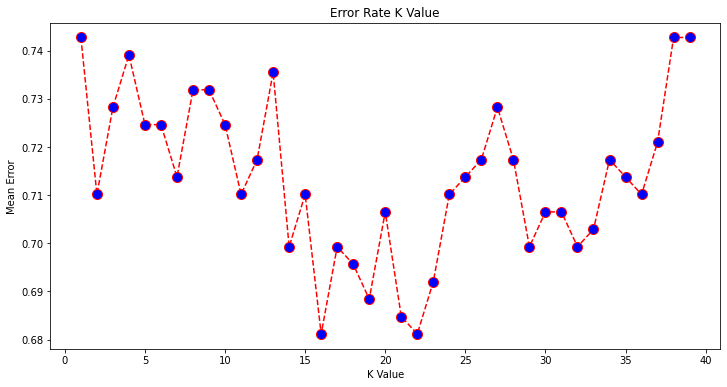

In [11]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i, metric="euclidean")
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')